In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('diabetes.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'Outcome']
y = df.Outcome
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)



df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 
              'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

In [14]:
df_balanced = pd.read_csv("df_smoted.csv")
df_balanced.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df_balanced['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [16]:
X = df_balanced.loc[:, df_balanced.columns != 'Outcome']

In [17]:
y = df_balanced.Outcome

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [20]:
import tensorflow as tf

In [22]:
X_train.shape

(800, 8)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])

In [58]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data= (X_test, y_test))

Epoch 1/25
25/25 [==============================] - 1s 11ms/step - loss: 0.6819 - accuracy: 0.5375 - val_loss: 0.9911 - val_accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.6162 - val_loss: 0.8859 - val_accuracy: 0.3900
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.6625 - val_loss: 0.8512 - val_accuracy: 0.4250
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7100 - val_loss: 0.8203 - val_accuracy: 0.4450
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.7138 - val_loss: 0.7901 - val_accuracy: 0.4900
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.7350 - val_loss: 0.7089 - val_accuracy: 0.5550
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7525 - val_loss: 0.6678 - val_accuracy: 0.6650
Epoch 8/25
25/25 [=

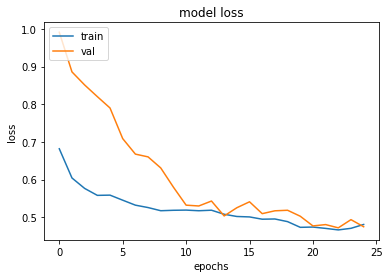

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

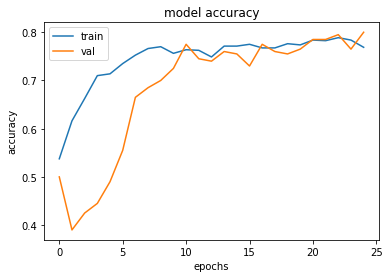

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [64]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

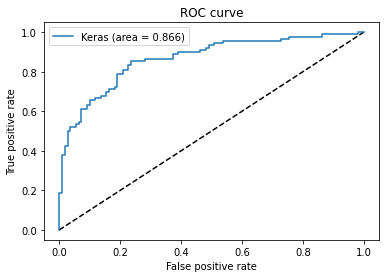

In [68]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()